> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `isds2020` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

# Session 3: Python plotting
In this combined teaching module and exercise we will work with visualizations in python, using two powerful plotting libraries. We will also quickly touch upon using pandas for exploratory plotting. 

We will work with the two datasets `iris`, `tips` and `titanic` both of which you should have loaded using the code below. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 

%matplotlib inline 

iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

To get an idea of what plotting is all about watch the video below with a discussion of when we should plot and some thoughts about the content. 

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('kIAhPZC6zv8', width=640, height=360)

The Python ecosystem has a number of fantastic packages that can do various different plots. We will work mainly with two packages in this course. The first is the classic tool, `matplotlib`, which was an adaptation in the plotting tools from matplotlib. The second tool is `seaborn` which is newer module that allows to produce figures with less effort, similar to `ggplot2` in `R`. Watch the video below to hear more about these tools.

In [ ]:
YouTubeVideo('t1LdqdmghIs', width=640, height=360)

We have already used Seaborn above to load some datasets. Below we inspect the contents of `tips`:

In [4]:
print('Number of rows:',len(tips),'\n')
print(tips.head(7))

Number of rows: 244 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2


# Introduction to plotting


## The histogram 

We start out with introducing some of the most fundamental plots, the histogram and Kernel Density plot. We want to plot data in one dimension. To understand how we do that we should know the math behind it.

Recall that we have learned about the method called `value_counts` for counting discrete data in Python. Below we count the number of instance that the `total bill` have in discrete bins split by 20$ apart. Note that we turn the numeric data into categorical/discrete data in order to count it.

In [5]:
tb = tips['total_bill']

cuts = np.arange(0, 100, 20) # range from 0 to 100 with 20 between
tb_cat = pd.cut(tb, cuts) # cut into categorical data
tb_cat.value_counts()

(0, 20]     147
(20, 40]     87
(40, 60]     10
(60, 80]      0
Name: total_bill, dtype: int64

Once we have counted the data we can make what is known as histogram that shows the counts for different bins, which are made from splitting the data as we did above. The plot automatically decides width of the bins.

The code below produces a histogram which we have customized ourselves using `matplotlib`.

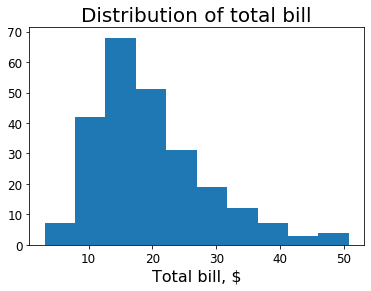

In [6]:
f,ax = plt.subplots()
ax.hist(tb)
ax.set_title('Distribution of total bill')
ax.set_xlabel('Total bill, $')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(16)
    
for item in ax.get_yticklabels()+ax.get_xticklabels():
    item.set_fontsize(12)    

# Explanatory plotting


## Kernel density (KDE)
To understand how we actually got to that figure we will follows the *layered grammar of graphics*. We go from an empty canvas and fills it up by adding and removing elements.

In the video below we will see how we can make a Kernel Density (KDE) plot. These approximate the frequency by interpolate the count of observations within some bandwith. We will use `seaborn` to make the plot but modify it using `matplotlib`.

In [ ]:
YouTubeVideo('ns-JKVZzeLA', width=640, height=360)

## Advice on plotting
You might be wondering - what are some tips for making **explanatory** plots in a report?  **<font color="red">(Exam relevant!)</font>**

1. Clear narratives - should convey key point(s)
  - If you to show difference between groups in data make sure it is easy to distinguish them.

1. Keep simplicity.
  - Anything unnecessary should be removed, see [this post](https://www.darkhorseanalytics.com/blog/data-looks-better-naked/).
  
1. Self explanatory
  - Contain axis label, title, footnotes in text containing relevant information.
1. Nice appereance 
  - Choose the right plot type.
  - Make sure font type, size, colors, line width.
  

In the first couple of exercises we will work with the titanic dataset. We will create a simple figure from the bottom using the [_grammar of graphics_](http://vita.had.co.nz/papers/layered-grammar.pdf) framework.


<br>

***NOTE:*** Because of the way the jupyter notebooks are made, you will have to complete this exercise in a single code cell. 

> **Ex. 3.1.1:** Create an empty coordinate system with the *x* axis spanning from 0 to 100 and the *y* axis spanning 0 to 0.04.
<br><br>

> **Ex. 3.1.2:** Add three KDE-curves to the existing axis. The KDEs should estimate the density of passenger age within each passenger class. Add a figure title and axis labels. Make sure the legend entries makes sense. *If* you have time, change the colors.
>
> > _Hint:_ a `for` loop might be useful here.
<br><br>

> **Ex. 3.1.3:** Saving plots with matplotlib can be done with the `plt.savefig('file_name.file_format')` method. The supported file formats are `['ps','eps','pdf','pgf','png','raw',rgba','svg','svgz','jpg','jpeg','tif','tiff']`. Choose your preferred file format and save your plot with the filename `ex_313_plot`.

 
The following exercises are optional! They highlight some of the advanced uses of matplotlib and seaborn. These techniques allow you to create customized plots with a lot of versatility. These are **_BONUS_** questions.
> **Ex. 3.1.4:** Add a new subplot that sits within the outer one. Use `[0.55, 0.6, 0.3, 0.2]` the subplots size. At this point your figure should look something like this: 
>
> <img src="exampleq4.png" alt="Drawing" style="width: 400px;"/>
>
>> _Hint:_ This [link](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html) has some tips for plotting subplots.

<br><br>
> **Ex. 3.1.5:** Move the legend outside the graph window, and add a barplot of survival probabilities split by class to the small subplot. The barplot is introduced below. 
>
>> _Hint:_ [Look here](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot) for examples of how to move the legend box around.
>
> In the end your figure should look similar to this one:
> <img src="final5.png" alt="Drawing" style="width: 400px;"/>


In [8]:
# [Answer to Ex. 3.1.x]

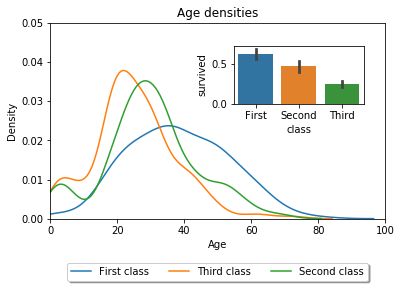

In [9]:
# Question 1
fig, ax1 = plt.subplots(1,1)

ax1.set_xlim(0, 100)
ax1.set_ylim(0, 0.05)


titanic = sns.load_dataset('titanic')


# Question 2
for c in set(titanic['class']):
    x = titanic.loc[titanic['class'] == c, 'age'].dropna()
    sns.kdeplot(x, ax = ax1, label = c + ' class')

ax1.set_xlabel("Age")
ax1.set_ylabel("Density")
ax1.set_title("Age densities")

# Question 3 
plt.savefig('ex_313_plot.png')


# BONUS QUESTIONS ----------------------------------------
# Question 4
ax2 = fig.add_axes([0.55, 0.6, 0.3, 0.2])
plt.savefig('exampleq4.png')

# Question 5
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)


sns.barplot(x='class', y='survived', data=titanic, ax = ax2)
plt.savefig('final5.png')

# Exploratory plotting 

Often we are only interested in a figure to get brief glimpse of the content, e.g. if you just want to check something yourself. In this case, because your audience is limited you should choose something that is good enough with little effort. The fastest is to plot directly with `pandas` as it have methods built-in. However, this is often cumbersome and does not produce great results. Therefore, we recommend using `seaborn` which we will focus on in the remainder of this module.

## Plotting two numeric variables

With numeric data we can plot the relationship between two variables. 

A common way of plotting this relationship is showing the raw data with point cloud, which is known as a `scatterplot`. This is an effective plot when our dataset is small (e.g. <1000). It can also be used for larger datasets, but then it is a good idea to color by degree of overlap (use the `alpha` keyword).

 The example below shows a scatterplot for `total_bill` and `tip`.

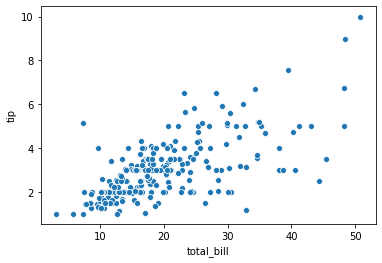

In [10]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip'])

We can also interpolate the points, which is what the KDE plot does when we apply it in a two-dimensional context. The example below shows a 2d-KDE for `total_bill` and `tip`.

C:\Users\Mathilde Bechmann\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


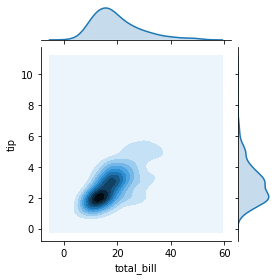

In [11]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde', height=4) # hex

## Combining numeric and categorical 

Watch the video below to get an idea of how you can combine data which is numeric and categorical.

In [ ]:
YouTubeVideo('u__lQztbMcM', width=640, height=360)

#### Violins, boxes and bars

We skipped over the barplot because it's too simple. The idea is you plot the mean and possibly the standard error measure. When we use both categorical data and numeric we can make a bar plot for each of the categories. 

The example below shows two plots. 
- The left shows a bar for each day of the week with data. 
- The right shows a box and whiskers plot, which is split by gender/sex.
> Mini exercises: 
  - Try to alter the code for the left figure and insert the keyword `hue='sex'`. What happens?
  - Also try to change the right figure from `boxplot` to `violinplot`. Explain what the violinplot shows. If you are in doubt read about violinplots [here](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d?gi=e7601874575d).

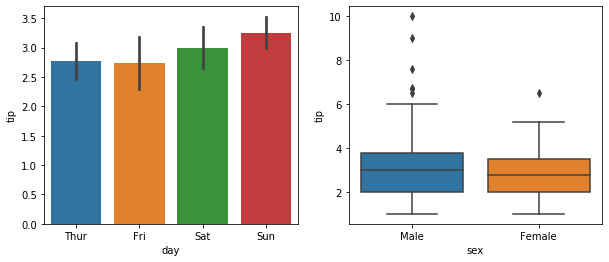

In [13]:
f,ax = plt.subplots(1,2, figsize=(10,4))
sns.barplot(x='day', y='tip',  data=tips, ax=ax[0]) 
sns.boxplot(x='sex', y='tip', data=tips, ax=ax[1]) 
# f.savefig('my_box.pdf')
# sns.violinplot(x='sex', y='tip', data=tips)

#### Linear model plots
There are many other bivariate plots, than the scatter and KDE plots. E.g. the [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) which puts draws the forecast and uncertainty of a linear regression model on top of a scatter plot. In the example below we make a linear model plot but where we distinguish by gender/sex:

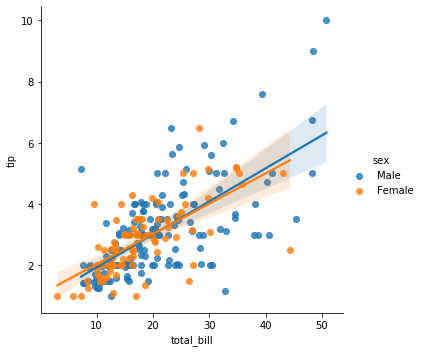

In [14]:
sns.lmplot('total_bill', 'tip', hue='sex', data=tips)

## Advanced exploratory plots

Sometimes we just want a quick and dirty overview of our dataset. One way is to plot the the pairwise relationships between all variables, which is possible using the pairplot. 

In the example below we see how this plot quickly provides us within an overview of the association between the variables `tip`, `total_bill` and `size`. Note that we can the kind of plot it uses, e.g. KDE also for the two-way plot.

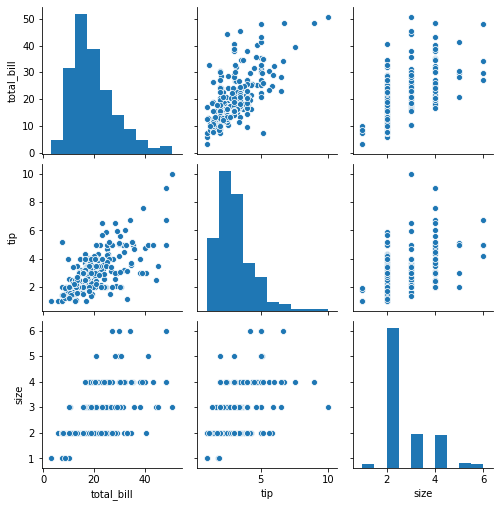

In [15]:
sns.pairplot(tips, height=2.3) # make hist and scatter for all

We can also make the plot of regression models more general so that we split the data by types. This allows us to explore heterogeneous relationships, see the example below.

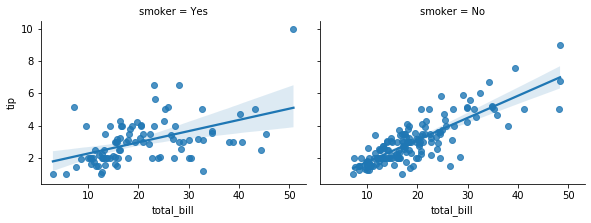

In [16]:
g = sns.FacetGrid(tips, col='smoker',  height=3.2, aspect=1.3) #row='sex'
g = g.map(sns.regplot, 'total_bill', 'tip')

We move on exercise 3.2. where you are to explore another dataset with plots. The goal with the plots you produce in this section is to give yourself and your group members an improved understanding of the datasets. Thus, here we want to be able to quickly inspect the data, rather than having a polished, explanatory figure.


> **Ex. 3.2.1:**: Show the first five rows of the titanic dataset. What information is in the dataset? Use a barplot to show the probability of survival for men and women within each passenger class. Can you make a boxplot showing the same information (why/why not?). _Bonus:_ show a boxplot for the fare-prices within each passenger class. 
>
> Spend five minutes discussing what you can learn about the survival-selection aboard titanic from the figure(s).
>
> > _Hint:_ https://seaborn.pydata.org/generated/seaborn.barplot.html, specifically the `hue` option.


In [17]:
# [Answer to Ex. 3.2.1]

In [1]:
# HANDIN

> **Ex. 3.2.2:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
> _Discuss:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
>> _Hint:_ use the `.regplot` method from seaborn. 

In [19]:
# [Answer to Ex. 3.2.2]

In [2]:
# HANDIN

> **Ex. 3.2.3:** Combine the two of the figures you created above into a two-panel figure similar to the one shown here:
> <img src="Example.png" alt="Drawing" style="width: 600px;"/>
>
> Save the figure as a png file on your computer. 
>> _Hint:_ See [this question](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot) on stackoverflow for inspiration.

In [21]:
# [Answer to Ex. 3.2.3]

In [3]:
# HANDIN

> **Ex. 3.2.4:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

In [23]:
# [Answer to Ex. 3.2.4]

In [4]:
# HANDIN